# MODELO HIERARCHICAL

## Juan David Mora Daza

## Preparar el Entorno

In [3]:
pip install matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.


## Importar las Bibliotecas

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

## Cargar y Explorar los Datos

In [12]:
# Cargar los datos
data = pd.read_csv('Mall_Customers.csv')

# Seleccionar las columnas relevantes (por ejemplo, 'Annual Income' y 'Spending Score')
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Verificar los primeros registros
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Escalar los Datos

In [17]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Crear el Dendrograma

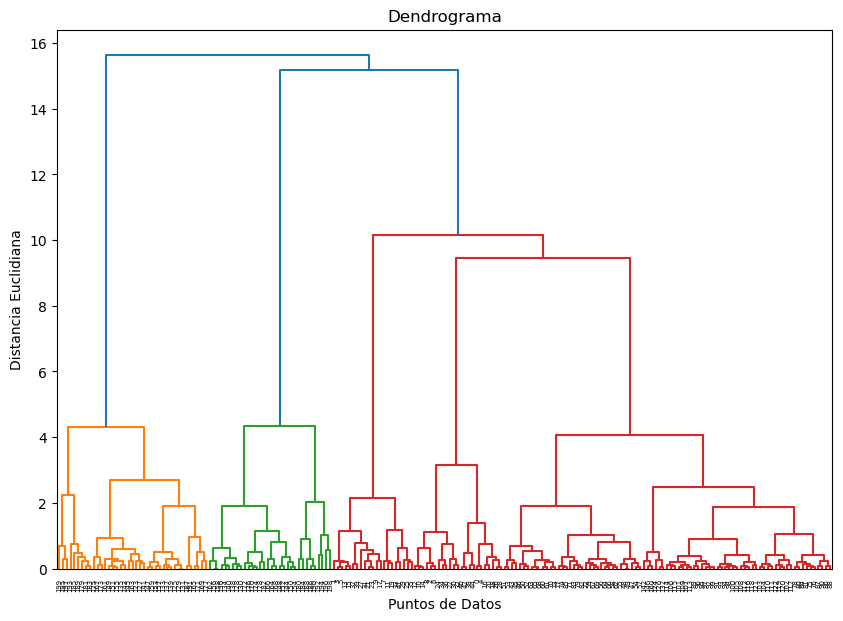

In [20]:
# Generar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linkage(X_scaled, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

## Aplicar Clustering Jerárquico

In [25]:
# Crear el modelo de clustering jerárquico
linked = linkage(X_scaled, method='ward')

# Definir el número de clústeres según el dendrograma (por ejemplo, 3)
labels = fcluster(linked, 3, criterion='maxclust')

# Agregar las etiquetas de clúster al DataFrame original
data['Cluster'] = labels

## Visualizar los Clústeres

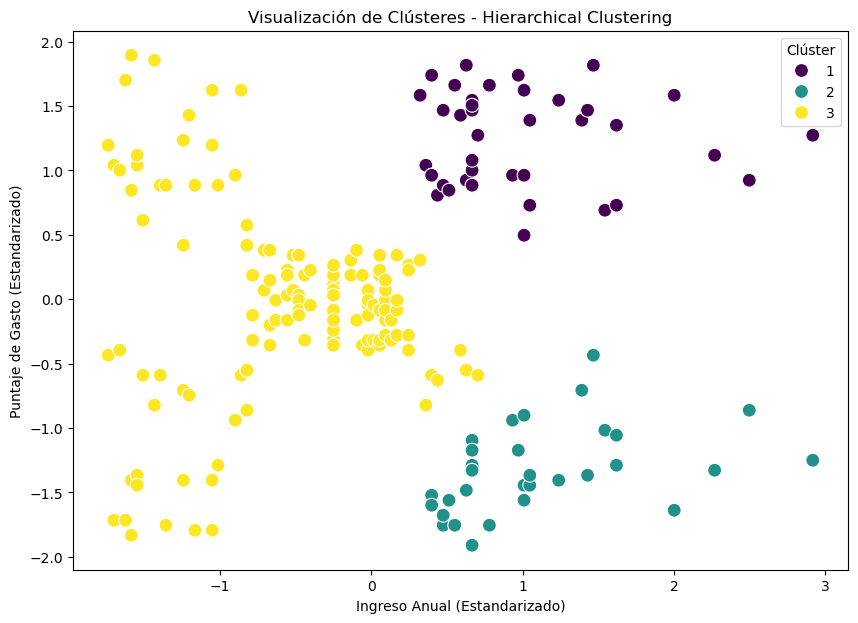

In [34]:
# Visualización de los clústeres con un gráfico de dispersión
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=X_scaled[:, 0],  # Eje X (por ejemplo: Ingreso Anual)
    y=X_scaled[:, 1],  # Eje Y (por ejemplo: Puntaje de Gasto)
    hue=labels,        # Clústeres asignados
    palette='viridis', # Paleta de colores
    s=100              # Tamaño de los puntos
)

# Etiquetas y título del gráfico
plt.title('Visualización de Clústeres - Hierarchical Clustering')
plt.xlabel('Ingreso Anual (Estandarizado)')
plt.ylabel('Puntaje de Gasto (Estandarizado)')
plt.legend(title='Clúster')
plt.show()

## Evaluar los Resultados

In [37]:
from sklearn.metrics import silhouette_score

# Calcular el coeficiente de silhouette
silhouette = silhouette_score(X_scaled, labels)
print(f"Coeficiente de Silhouette: {silhouette:.2f}")

Coeficiente de Silhouette: 0.46


## Guardar los Resultados

In [40]:
# Guardar los resultados en un archivo CSV
data.to_csv('Mall_Customers_with_Hierarchical_Clusters.csv', index=False)
print("Archivo guardado con los resultados.")

Archivo guardado con los resultados.


## Interpretación de los Datos
### Dendrograma:
El dendrograma muestra cómo los datos se agrupan jerárquicamente según la similitud.
Se pueden identificar visualmente 4 clústeres principales al cortar el dendrograma a una distancia razonable (por ejemplo, alrededor de 10 en la escala de distancia euclidiana).
Cada clúster agrupa clientes con características similares según sus ingresos anuales y puntajes de gasto.

### Coeficiente de Silhouette (0.46):
El valor indica una separación moderada entre los clústeres, aunque no perfecta.
Los clústeres están lo suficientemente separados para identificar grupos distintos, pero podría haber cierta superposición entre ellos.

### Distribución Visual de los Clústeres:
Los datos muestran que los clientes pueden clasificarse en grupos con características de comportamiento de gasto e ingreso anuales similares.
Esto permite identificar patrones específicos dentro de los clústeres, como clientes con alto gasto y alto ingreso versus aquellos con bajo ingreso y bajo gasto.

## Conclusión
El análisis de Hierarchical Clustering sugiere que los clientes del conjunto de datos pueden agruparse en 4 categorías principales con base en sus ingresos anuales y su puntaje de gasto.

### Para mejorar el análisis:
Considerar ajustar los parámetros del modelo jerárquico.
Experimentar con técnicas adicionales como K-means para comparar los resultados.
Incorporar más variables relacionadas con el comportamiento de los clientes para un análisis más detallado.